# Modelling Strategie
We looking for solve a classification problem like:\
*What range a goal would belongs ?*\
In our EDA we have seen that the average of goal may be used to make prediction
- Target = **class (we gonna cut in bins a given target, it might be a team goal scored or conceded...)**
- Features = **goal averages for team at home and away**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import random

### Feature Engineering

In [2]:
path = Path.cwd().parent.parent / 'data' / '2022_23' / 'results' / 'ligue1.csv'
df = pd.read_csv(path, parse_dates=True, index_col='date_time')
df.head()

,journée,home_team,away_team,1st_home_team_goal,1st_away_team_goal,1st_total_goal,2nd_home_team_goal,2nd_away_team_goal,2nd_total_goal,total_home_team_goal,total_away_team_goal,global
date_time,,,,,,,,,,,,
2023-06-03 19:00:00,38,AC Ajaccio,Marseille,0,0,0,1,0,1,1,0,1
2023-06-03 19:00:00,38,Nice,Lyon,3,1,4,0,0,0,3,1,4
2023-06-03 19:00:00,38,Troyes,Lille,0,0,0,1,1,2,1,1,2
2023-06-03 19:00:00,38,Reims,Montpellier,1,0,1,0,3,3,1,3,4
2023-06-03 19:00:00,38,PSG,Clermont,2,2,4,0,1,1,2,3,5


In [3]:
def avg_per_match():
    """This function will calculate for each team
    the average of goal after each journée
    """
    data = df.copy()
    data = data.sort_values(by='journée', ascending=True)
    data.drop(['1st_home_team_goal', '1st_away_team_goal',
               '1st_total_goal', '2nd_home_team_goal', '2nd_away_team_goal',
               '2nd_total_goal'], axis=1, inplace=True)
    for row in data.iterrows():
        at_home = data[data['home_team']==data['home_team']]
        at_away = data[data['away_team']==data['away_team']]
        data['ht_scored_avg'] = at_home.groupby('home_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_conceded_avg'] = at_home.groupby('home_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_scored_avg'] = at_away.groupby('away_team')['total_away_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['at_conceded_avg'] = at_away.groupby('away_team')['total_home_team_goal'].transform(lambda x: x.expanding().mean().shift())
        data['ht_global_avg'] = at_home.groupby('home_team')['global'].transform(lambda x: x.expanding().mean().shift())
        data['at_global_avg'] = at_away.groupby('away_team')['global'].transform(lambda x: x.expanding().mean().shift())
    return data

In [4]:
data = avg_per_match()
data.tail(10)

,journée,home_team,away_team,total_home_team_goal,total_away_team_goal,global,ht_scored_avg,ht_conceded_avg,at_scored_avg,at_conceded_avg,ht_global_avg,at_global_avg
date_time,,,,,,,,,,,,
2023-06-03 19:00:00,38,Monaco,Toulouse,1,2,3,2.000000,1.722222,1.222222,1.611111,3.722222,2.833333
2023-06-03 19:00:00,38,Brest,Rennes,1,2,3,1.277778,1.333333,1.333333,1.333333,2.611111,2.666667
2023-06-03 19:00:00,38,Lorient,Strasbourg,2,1,3,1.333333,1.111111,1.388889,1.722222,2.444444,3.111111
2023-06-03 19:00:00,38,Nantes,Angers,1,0,1,1.055556,1.444444,0.722222,2.444444,2.500000,3.166667
2023-06-03 19:00:00,38,Auxerre,Lens,1,3,4,0.944444,1.388889,1.333333,0.833333,2.333333,2.166667
2023-06-03 19:00:00,38,PSG,Clermont,2,3,5,2.388889,1.222222,1.222222,1.055556,3.611111,2.277778
2023-06-03 19:00:00,38,Reims,Montpellier,1,3,4,1.500000,1.111111,1.833333,1.777778,2.611111,3.611111
2023-06-03 19:00:00,38,Troyes,Lille,1,1,2,1.000000,1.611111,1.333333,1.000000,2.611111,2.333333
2023-06-03 19:00:00,38,Nice,Lyon,3,1,4,1.166667,0.944444,1.611111,1.388889,2.111111,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 380 entries, 2022-08-05 19:00:00 to 2023-06-03 19:00:00
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   journée               380 non-null    int64  
 1   home_team             380 non-null    object 
 2   away_team             380 non-null    object 
 3   total_home_team_goal  380 non-null    int64  
 4   total_away_team_goal  380 non-null    int64  
 5   global                380 non-null    int64  
 6   ht_scored_avg         360 non-null    float64
 7   ht_conceded_avg       360 non-null    float64
 8   at_scored_avg         360 non-null    float64
 9   at_conceded_avg       360 non-null    float64
 10  ht_global_avg         360 non-null    float64
 11  at_global_avg         360 non-null    float64
dtypes: float64(6), int64(4), object(2)
memory usage: 38.6+ KB


In [6]:
# we started to drop columns which contains missing values
dataset = data[data['journée'] > 2]

code = {
        'under 2.5': 0,
        'over 2.5': 1}
dataset['class'] = dataset['class'].map(code)

### MODELLING

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [8]:
# X represent the feature used to make prediction
# We will take the scored average for the team at home 
# and the conceded average for team at away before the present match
# in order to predict goal scored of team at home 
# (note that goal scored of a team is also the goal conceded of the other team)
X = dataset[['ht_scored_avg', 'at_conceded_avg']]
y = pd.cut(x=dataset['total_home_team_goal'], bins=[min(dataset['total_home_team_goal']), 2,
                                                    max(dataset['total_home_team_goal'])],
                                                    labels=['under 2.5', 'over 2.5'], include_lowest=True)

In [14]:
# We gonna split the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [10]:
def training(x_train, y_train, model):
    """This fonction aims to train the model selected
    Tuning to find the best parameter given
    Test our model on the test set
    and show some metrics to evaluate performance of the model
    
    Returns:
        estimator: the estimator with the best score
    """
    parameter = [{'n_estimators': range(1, 15),
                  'max_depth': range(1, 15)}]
    grid = GridSearchCV(estimator=model, param_grid=parameter, scoring='accuracy', cv=5)
    grid.fit(x_train, y_train)
    print(f"best estimator:{grid.best_estimator_}")
    print(f"best score: {grid.best_score_}")
    return grid.best_estimator_

In [11]:
def evaluation(x_test, y_test, model):
    """Test our model on the test set
    and show some metrics to evaluate performance of the model
    """
    print(f"Final Score {model.__class__.__name__} : {model.score(x_test, y_test)}")
    print(confusion_matrix(y_test, model.predict(x_test)))
    print(classification_report(y_test, model.predict(x_test)))

    N, train_score, val_score = learning_curve(
        model, x_train, y_train, train_sizes= np.linspace(0.1, 1.0, 10), cv=5
    )

    plt.plot(N, train_score.mean(axis=1), label='train')
    plt.plot(N, val_score.mean(axis=1), label='validation')
    plt.xlabel('train size')
    plt.legend()
    plt.show()

In [15]:
estimator = training(X, y, RandomForestClassifier(random_state=22))

best estimator:RandomForestClassifier(max_depth=5, n_estimators=9, random_state=22)
best score: 0.825


Final Score RandomForestClassifier : 0.8638888888888889
[[ 18  48]
 [  1 293]]
              precision    recall  f1-score   support

    over 2.5       0.95      0.27      0.42        66
   under 2.5       0.86      1.00      0.92       294

    accuracy                           0.86       360
   macro avg       0.90      0.63      0.67       360
weighted avg       0.88      0.86      0.83       360



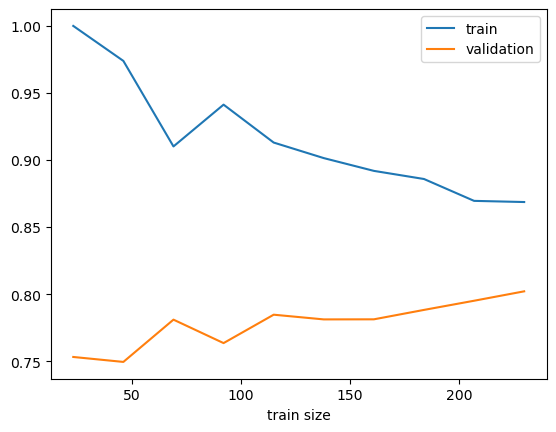

In [16]:
evaluation(X, y, model=estimator)

### Interpretation 
After completion of the modelling strategie, we can notice that the RandomForestClassifier give us a good score, but when we look close of it, there's a thing\
our class is very unbalanced, so the majoritary class is predict better than the other one, beside our model seems have underfitting issue.\
We gonna test other model like the SVM, who is robust to unbalanced classes.


In [20]:
def training_svc(x_train, y_train, model):
    """This fonction aims to train the model selected
    Tuning to find the best parameter given
    Test our model on the test set
    and show some metrics to evaluate performance of the model
    
    Returns:
        estimator: the estimator with the best score
    """
    parameter = [{'kernel': ['poly', 'linear', 'rbf', 'sigmoid'],
                  'C': range(1, 5),
                  'class_weight': ['balanced']}]
    grid = GridSearchCV(estimator=model, param_grid=parameter, scoring='accuracy', cv=5)
    grid.fit(x_train, y_train)
    print(f"best estimator:{grid.best_estimator_}")
    print(f"best score: {grid.best_score_}")
    return grid.best_estimator_

In [21]:
estimator = training_svc(x_train, y_train, svm.SVC())

best estimator:SVC(C=1, class_weight='balanced', kernel='poly')
best score: 0.7497882637628555


Final Score SVC : 0.8194444444444444
[[ 7  7]
 [ 6 52]]
              precision    recall  f1-score   support

    over 2.5       0.54      0.50      0.52        14
   under 2.5       0.88      0.90      0.89        58

    accuracy                           0.82        72
   macro avg       0.71      0.70      0.70        72
weighted avg       0.81      0.82      0.82        72



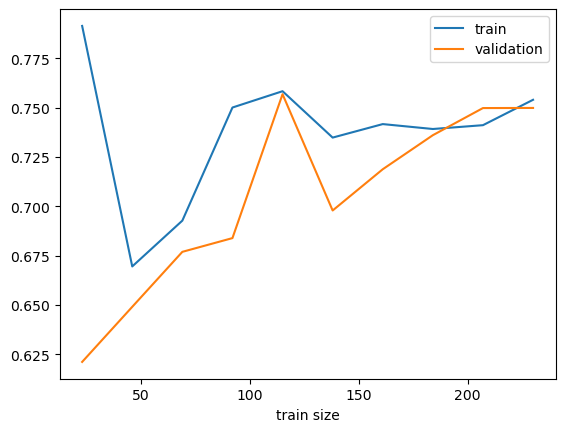

In [22]:
evaluation(x_test, y_test, model=estimator)

### Interpretation
The SVC model trained not offer a better result than the RFClassifier.\
But it seems generalized well than the other one.